

Running for dataset: https://www3.cs.stonybrook.edu/~anshul/courses/cse391_s19/q2_sigma3.dat

Prior is 0.09756466911632687
Likelihood is 0.008292187613805442
Posterior is 0.000809024540791432


Prior is 0.000809024540791432
Likelihood is 0.0029234956355312586
Posterior is 2.3651797140414323e-06


Prior is 2.3651797140414323e-06
Likelihood is 0.005184362253640049
Posterior is 1.2261948432551566e-08


Prior is 1.2261948432551566e-08
Likelihood is 0.006729401213665823
Posterior is 8.251557066392025e-11


Prior is 8.251557066392025e-11
Likelihood is 0.005400612894068525
Posterior is 4.456346548889902e-13

   post_mean  post_variance
0   4.590762       0.287348
1   4.813524       0.207514
2   4.921257       0.170664
3   4.972837       0.148340
4   4.983966       0.132973


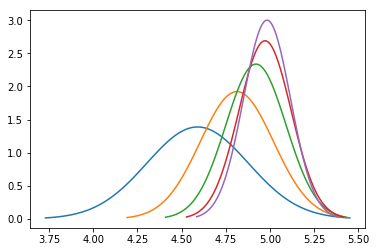



Running for dataset: https://www3.cs.stonybrook.edu/~anshul/courses/cse391_s19/q2_sigma100.dat

Prior is 0.09756466911632687
Likelihood is 0.34564718688507984
Posterior is 0.03372295341943201


Prior is 0.03372295341943201
Likelihood is 0.4909041143075518
Posterior is 0.016554736580201096


Prior is 0.016554736580201096
Likelihood is 0.3917494853401705
Posterior is 0.006485309535235874


Prior is 0.006485309535235874
Likelihood is 0.4984970032475094
Posterior is 0.003232907368447581


Prior is 0.003232907368447581
Likelihood is 0.4262610489852426
Posterior is 0.001378062486146586

   post_mean  post_variance
0   0.058716       0.995037
1   0.095009       0.990148
2   0.138226       0.985329
3   0.171219       0.980581
4   0.218918       0.975900


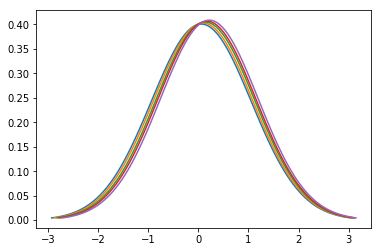

In [1]:
#Completed by Nick Gundobin 110805377
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

def bayes(url, data_sigma, prior_mu, prior_sigma):
    data = pd.read_csv(url,delimiter = ',', header = None)
    #open table created to track post mean and variance for each row
    posttable = pd.DataFrame(columns=['post_mean', 'post_variance'])
    print("\n\nRunning for dataset: "+str(url))
    #cycle through designated rows of data
    for row in range(5):
        n = len(data.iloc[row])
        data_mu = np.mean(data.iloc[row])
        posterior_mean = ((prior_mu/prior_sigma**2) + ((n * data_mu)/data_sigma**2))/((1/prior_sigma**2) + (n/data_sigma**2))
        posterior_sigma = np.sqrt(1/((1/prior_sigma**2) + (n/data_sigma**2)))
        #print(posterior_mean)
        #print(posterior_sigma)
        #add the posterior mean and sigma to table
        posttable = posttable.append({"post_mean":posterior_mean, 
                    "post_variance":posterior_sigma}, ignore_index = True)
    
    
        #if it is the first row, then canculate the prior in addition to likelihood
        #otherwise we will use prior from previous post and then calculate likelihood
        if row == 0:
            prior = 1
            xx = np.linspace(prior_mu - 3*prior_sigma, prior_mu + 3*prior_sigma, 100)
            for i in stats.norm.pdf(xx, prior_mu, prior_sigma):
                prior *= np.exp(-((i-prior_mu)**2)/(2*prior_sigma**2))

        likelihood = 1
        for i in data.iloc[row]:
            #print("Prior for row "+str(row)+" is "+str(prior))
            likelihood *= np.exp(-((i-data_mu)**2)/(2*data_sigma**2))

        print("\nPrior is "+str(prior))
        print("Likelihood is "+str(likelihood))
        posterior = prior*likelihood
        print("Posterior is "+str(posterior)+"\n")
        x = np.linspace(posterior_mean - 3*posterior_sigma, posterior_mean + 3*posterior_sigma, 100)
        plt.plot(x, stats.norm.pdf(x, posterior_mean, posterior_sigma))
    
    
        #x_axis = np.arange(3, 6.5, 0.001)
        #plt.plot(x_axis, stats.norm.pdf(x_axis,posterior_mean,posterior_sigma))
    
        #set prior values for next row as the post from current row
        prior = float(posterior)
        prior_mu = float(posterior_mean)
        prior_sigma = float(posterior_sigma)
    print(posttable)
    plt.show()

        
        
url1 = "https://www3.cs.stonybrook.edu/~anshul/courses/cse391_s19/q2_sigma3.dat"
url2 = "https://www3.cs.stonybrook.edu/~anshul/courses/cse391_s19/q2_sigma100.dat"

#call function bayes(url, data_sigma, prior_mu, prior_sigma)
bayes(url1,3,0,1)
bayes(url2,100,0,1)